# Surprise Housing Assignment

 The solution is divided into the following sections:

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

#### Data understanding and exploration

In [2]:
#Importing the data and check the first five rows
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Check the shape of the dataframe
print(house_data.shape)

(1460, 81)


In [4]:
# Check for column details
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### data cleaning

In [5]:
#Some statistical insights
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Chekcing the percentage of Null values in all the columns
print('Percentage of Missing Values in each column is as follows:')
print(round(house_data.isnull().sum()/len(house_data.index)*100,2).sort_values(ascending=False)[ round(house_data.isnull().sum()/len(house_data.index),2) > 0 ] )

Percentage of Missing Values in each column is as follows:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [7]:
#'Alley', 'PoolQC', 'Fence', and 'MiscFeature' columns are with very high number of nan values. Let's drop the columns
house_data = house_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [8]:
#As per the data dictionary the 'Id' is just an identifier with no predictive power. So let's drop the column
house_data.drop('Id', axis = 1, inplace = True)
print(house_data.shape)

(1460, 76)


In [9]:
house_data.shape

(1460, 76)

In [10]:
#check missing values

house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

### Data exploration

In [11]:
#impute missing values of LotFrontage with median due to some outliers in data
house_data.LotFrontage = house_data.LotFrontage.fillna(house_data.LotFrontage.median())

In [12]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()

69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [13]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath: Replacing missing data with 0
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    house_data[col].fillna('No Basement', inplace=True)

In [14]:
#GarageType, GarageFinish, GarageQual, and GarageCond: Replacing missing data with “None”.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    house_data[col].fillna('No Garage', inplace=True)
house_data['GarageYrBlt'].fillna(0, inplace=True)

In [15]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, and BsmtFinType2: For all these categorical basement-related features, NaN means that there isn’t a basement.
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    house_data[col].fillna('No Basement', inplace=True)

In [16]:
#MasVnrArea and MasVnrType: NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [17]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])   
house_data.FireplaceQu= house_data.FireplaceQu.fillna('No Fire')  

Derived Feature

In [18]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [19]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

missing values have been handled by dropping or imputation or creating new column

In [20]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [21]:
#  ExterQual column conversion to categorical.

house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})


In [22]:
#  BsmtQual column conversion to categorical.
house_data = house_data.replace({'BsmtQual':{'No Basement':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
# BsmtExposure column conversion to categorical.
house_data = house_data.replace({'BsmtExposure':{'No Basement':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})
# BsmtFinType1 column conversion to categorical.
house_data = house_data.replace({'BsmtFinType1':{'No Basement':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
# HeatingQC column conversion to categorical.
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
# KitchenQua column conversion to categorical.
house_data = house_data.replace({'KitchenQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#'FireplaceQu column conversion to categorical.
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'No Fire':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [23]:
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,WD,Normal,250000,8


In [24]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [25]:
# Separating the Numerical and Categorical features for analysis
# all numeric (float and int) variables in the dataset
num_df = house_data.select_dtypes(include=['float64', 'int64'])
cat_df = house_data.select_dtypes(include=['object'])

In [26]:
# Numerical features in the dataframe
num_df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'HouseAge'],
      dtype='object')

In [27]:
cat_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation',
       'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
for i in cat_df:
    print(i)
    print(cat_df[i].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [29]:
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,WD,Normal,250000,8


# Outlier Detection
Checking percentage of outliers for all the numerical columns.

In [30]:
outliers_percentage={}
num_df = house_data.select_dtypes(include=['float64', 'int64'])
for feature in num_df.columns:
    IQR=num_df[feature].quantile(.75)-num_df[feature].quantile(.25)
    outliers_count=num_df[(num_df[feature]>(num_df[feature].quantile(.75)+1.5*IQR)) | (num_df[feature]<(num_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/num_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
34,EnclosedPorch,14.25
11,BsmtFinSF2,11.44
8,BsmtExposure,9.18
3,OverallCond,8.56
36,ScreenPorch,7.95
0,LotFrontage,7.26
5,MasVnrArea,6.71
20,BsmtHalfBath,5.62
29,GarageYrBlt,5.55
33,OpenPorchSF,5.27


In [31]:
#Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 IQR, 75th percentile + 1.5 IQR]
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = house_data[feature].quantile(.75) - house_data[feature].quantile(.25) 
        max_value = house_data[feature].quantile(.75)+1.5*IQR
        min_value = house_data[feature].quantile(.25)-1.5*IQR
        house_data[feature][house_data[feature] > max_value] = max_value
        house_data[feature][house_data[feature] < min_value ] = min_value

In [32]:
# Checking the dataset after reassigning minmum and maximum values

house_data.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,69.090411,9647.388014,6.100685,5.543493,1984.865753,89.406336,3.39589,3.527055,1.584247,3.545890,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,180921.195890,36.514384
std,17.231909,3594.356399,1.378430,0.963696,20.645407,134.017553,0.57428,0.747251,0.970835,2.107776,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,79442.502883,30.149237
min,31.500000,1481.500000,2.000000,3.500000,1950.000000,0.000000,2.00000,1.500000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,34900.000000,0.000000
25%,60.000000,7553.500000,5.000000,5.000000,1967.000000,0.000000,3.00000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,129975.000000,8.000000
50%,69.000000,9478.500000,6.000000,5.000000,1994.000000,0.000000,3.00000,4.000000,1.000000,4.000000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,163000.000000,35.000000
75%,79.000000,11601.500000,7.000000,6.000000,2004.000000,164.250000,4.00000,4.000000,2.000000,6.000000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,214000.000000,54.000000
max,107.500000,17673.500000,10.000000,7.500000,2010.000000,410.625000,5.00000,5.000000,3.500000,6.000000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,755000.000000,123.000000


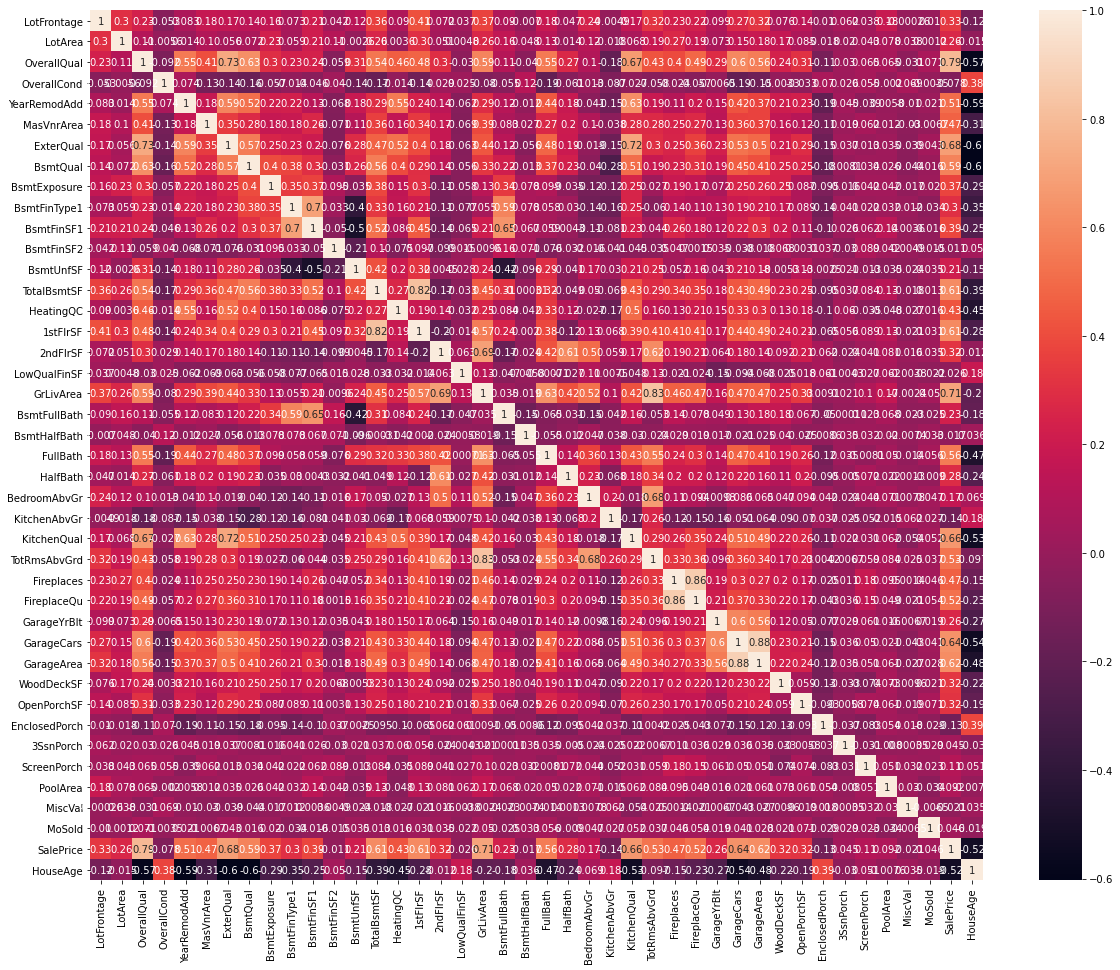

In [33]:
plt.figure(figsize=(20,16))
sns.heatmap(num_df.corr(),annot=True)
plt.show()

* GarageCars and GarageArea (0.88)
* GarageYrBlt and YearBuilt (0.83)
* TotRmsAbvGrd and GrLivArea (0.83)
* TotalBsmtSF and 1stflrSF (0.82)
The following are highly corelated as observd from the matrix

In [34]:
#So, let's drop these  columns

house_data1=house_data.drop(['GarageCars','TotRmsAbvGrd','TotalBsmtSF'],axis=1,inplace=True)

In [35]:
print(house_data.shape)

(1460, 72)


Univariate and Bivariate Analysis - Numerical Features
Analyzing Numerical Features with continuous values

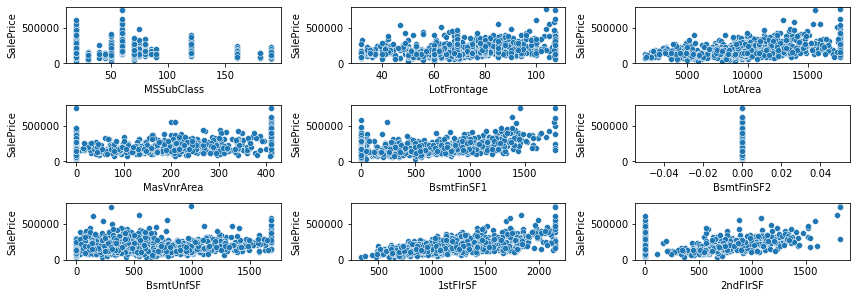

In [36]:
fig=plt.subplots(figsize=(12, 12))
features1=['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF']

for i, feature in enumerate(features1):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(house_data[feature], house_data['SalePrice'])
    plt.tight_layout()

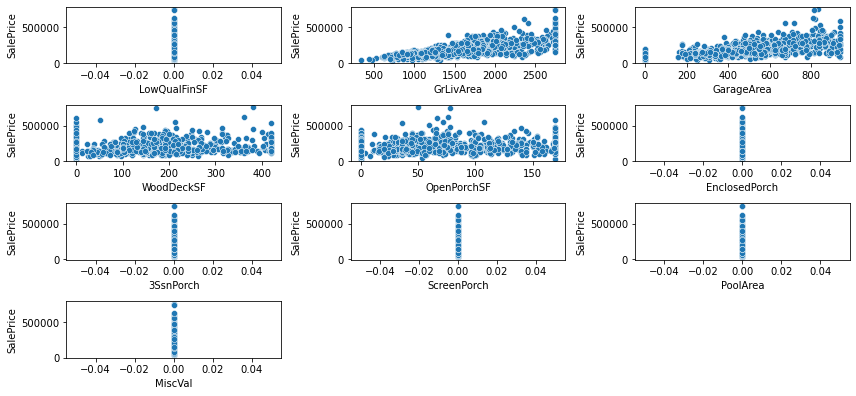

In [37]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(house_data[feature], house_data['SalePrice'])
    plt.tight_layout()


* 'BsmtFinSF2',LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' features have single values and can be dropped.
* Rest of the features are showing positive corelation salesprice

In [38]:
house_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorc

In [39]:
house_data.shape

(1460, 72)

Visualizing the distribution of the numeric features

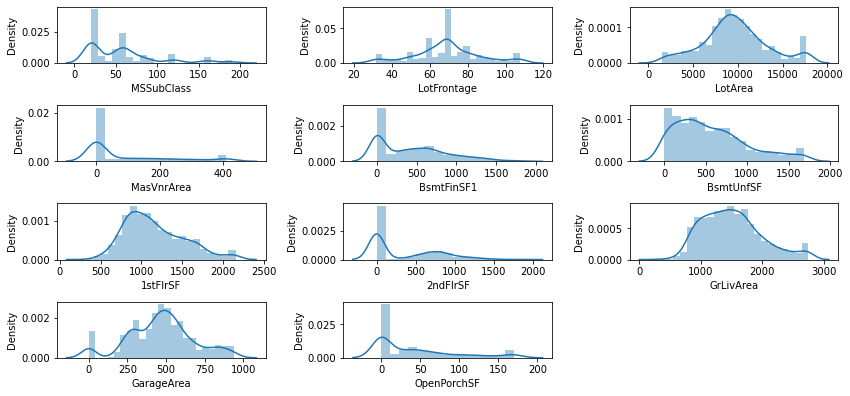

In [40]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF',  '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(house_data[feature])
    plt.tight_layout()

In [41]:
house_data[[ 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()


,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,1503.735873,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0
std,0.0,481.375641,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0
min,0.0,334.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,1129.500000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,1464.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,1776.750000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,2747.625000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0


In [42]:
#Removing these features having fixed values as they won't contribute in predicting SalePrice
house_data[['LowQualFinSF', 'EnclosedPorch','BsmtFinSF2', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()
house_data.drop(['LowQualFinSF', 'EnclosedPorch', 'BsmtFinSF2','3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)


In [43]:

# Checking the remaining columns
house_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SaleType', 'SaleCondition',
       'SalePrice', 'HouseAge'],
      

In [44]:
print(house_data.columns.shape)

(65,)


In [45]:
for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [46]:
num_df = house_data.select_dtypes(include=['float64', 'int64'])
cat_df = house_data.select_dtypes(include=['object'])

In [47]:
print(house_data.columns.shape)

(65,)


In [48]:
print(house_data['BsmtFullBath'].value_counts())
print(house_data['KitchenAbvGr'].value_counts())

0.0    856
1.0    588
2.0     15
2.5      1
Name: BsmtFullBath, dtype: int64
1    1460
Name: KitchenAbvGr, dtype: int64


In [49]:
# dropping KitchenAbvGr for not having useful information
house_data.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [50]:
print(house_data.columns.shape)

(64,)


In [51]:
for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [52]:
#Drop columns which have moe than 80% bias data
house_data=house_data.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [53]:
print(house_data.columns.shape)

(44,)


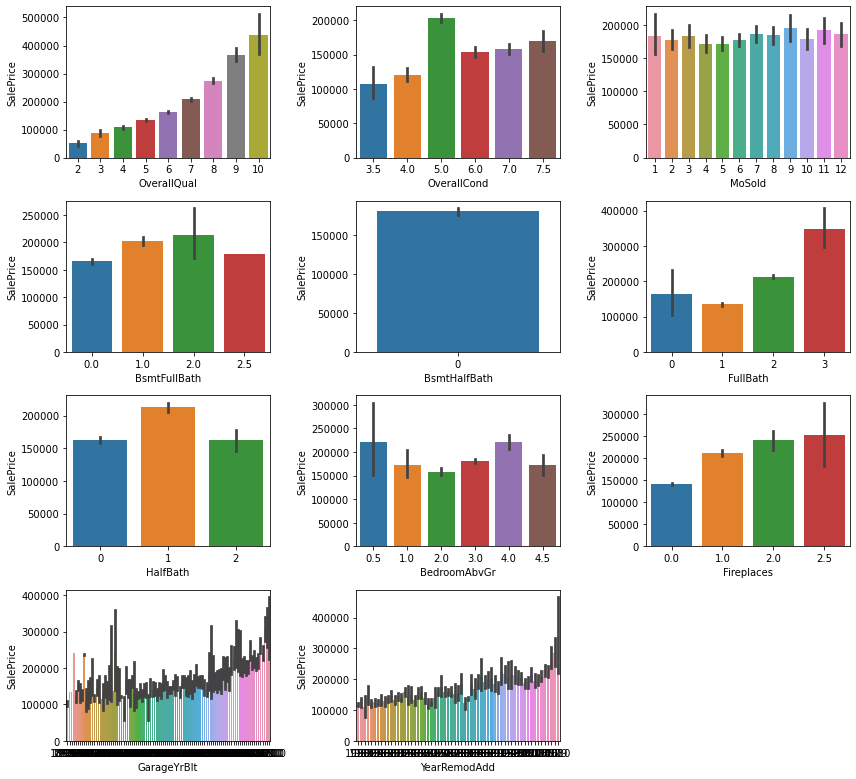

In [54]:
fig=plt.subplots(figsize=(12, 24))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','Fireplaces','GarageYrBlt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(house_data[feature], house_data['SalePrice'])
    plt.tight_layout()

In [55]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,...,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,...,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,...,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,...,1,0,0,0,0,0,0,0,0,0


In [56]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [57]:
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,...,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,...,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,...,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,...,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,...,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,...,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,...,0,1,0,0,0,0,0,1,0,0


In [60]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,...,1,0,0,0,0,0,0,0,0,0


In [61]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,...,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,...,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,...,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,...,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,...,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,...,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,...,0,0,1,0,0,1,0,0,0,0


In [63]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,...,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,...,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,...,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,...,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,...,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,...,0,0,0,0,1,0,0,1,0,0


In [66]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,...,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,...,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,...,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,...,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,...,0,0,1,0,0,0,1,0,0,0


In [67]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,...,1,0,0,0,1,0,0,0,0,0


In [68]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,...,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,...,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,...,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,...,0,0,0,0,0,1,0,0,0,1
4,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,...,0,1,0,0,0,0,0,0,1,0


In [69]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [70]:
house_data.shape

(1460, 138)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

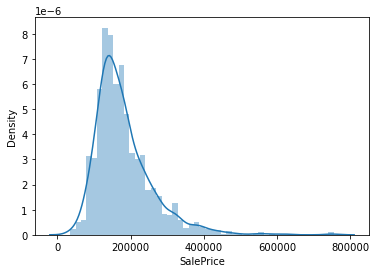

In [71]:
#Let's visualize the distribution of sale price
sns.distplot(house_data['SalePrice'])

In [72]:
#skewness and kurtosis
print("Skewness: %f" % house_data['SalePrice'].skew())

Skewness: 1.882876


In [73]:
house_data['SalePrice']=np.log(house_data.SalePrice) #tranforming to form normal disribution


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

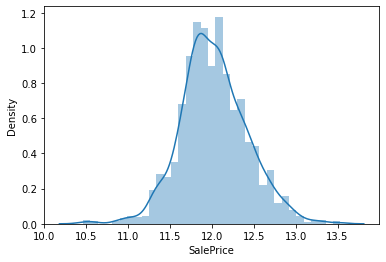

In [74]:
sns.distplot(house_data['SalePrice']) # Normally distributed now

In [75]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 138)
(439, 138)


In [76]:
#instantiate the object
scaler = MinMaxScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',  
           'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr',  'KitchenQual',  'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
               'MoSold', 'HouseAge']

#fit on data



df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
318,0.769737,0.519917,0.625,0.375,0.716667,0.62344,0.666667,0.714286,1.000000,1.000000,...,0,1,0,0,0,0,0,0,1,0
239,0.269737,0.448339,0.500,0.125,0.000000,0.00000,0.333333,0.428571,0.285714,0.333333,...,0,0,0,0,0,1,0,0,0,1
986,0.361842,0.236444,0.500,1.000,0.883333,0.00000,0.333333,0.428571,0.285714,0.166667,...,0,1,0,0,0,0,0,0,0,1
1416,0.375000,0.608850,0.250,0.625,0.000000,0.00000,0.333333,0.428571,0.285714,0.166667,...,0,0,0,0,0,1,0,0,0,1
390,0.243421,0.427588,0.375,1.000,0.000000,0.00000,0.333333,0.428571,0.285714,0.500000,...,0,0,0,0,0,1,0,0,0,1


In [77]:
df_train.describe()


,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.490451,0.502223,0.511753,0.513100,0.583072,0.217363,0.466536,0.577865,0.460753,0.598923,...,0.001959,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.055828,0.278159,0.421156
std,0.229273,0.221392,0.174552,0.239542,0.343416,0.328068,0.190447,0.216835,0.283047,0.352486,...,0.044237,0.492144,0.107826,0.244271,0.082557,0.443836,0.229701,0.229701,0.448312,0.493986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.368546,0.375000,0.375000,0.283333,0.000000,0.333333,0.428571,0.285714,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.493421,0.495522,0.500000,0.375000,0.733333,0.000000,0.333333,0.714286,0.285714,0.666667,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.611842,0.619473,0.625000,0.625000,0.900000,0.384779,0.666667,0.714286,0.857143,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
#Training The Model
#create X_train,y_train 

y_train = df_train.pop('SalePrice')
X_train = df_train

In [79]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_No Garage', 'GarageFinish_No Garage', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=137)

In [80]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 35)
rfe = rfe.fit(X_train,y_train)

In [81]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 85),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 103),
 ('ExterQual', False, 90),
 ('BsmtQual', True, 1),
 ('BsmtExposure', False, 8),
 ('BsmtFinType1', False, 62),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 2),
 ('HeatingQC', False, 29),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 19),
 ('FullBath', False, 14),
 ('HalfBath', False, 47),
 ('BedroomAbvGr', False, 89),
 ('KitchenQual', False, 45),
 ('Fireplaces', False, 94),
 ('FireplaceQu', False, 5),
 ('GarageYrBlt', False, 69),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 51),
 ('OpenPorchSF', False, 98),
 ('MoSold', False, 86),
 ('HouseAge', True, 1),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', False, 4),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 58),
 ('MSSubClass_60', False, 80),
 ('MSSubClass_70', False, 57),
 ('MSSub

In [82]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtQual',
       'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'HouseAge', 'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_90',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'HouseStyle_1.5Unf', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd',
       'Exterior2nd_Stone', 'Foundation_Wood'],
      dtype='object')

In [83]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'ExterQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath',
       ...
       'Foundation_Stone', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_No Garage', 'GarageFinish_No Garage', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=102)

In [84]:
#Building model using statsmodel
#creating X_train with RFE selected columns
X_train_rfe = X_train[col]

In [85]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [86]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [87]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     292.2
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        05:59:25   Log-Likelihood:                 737.57
No. Observations:                1021   AIC:                            -1403.
Df Residuals:                     985   BIC:                            -1226.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.6767      0.053    199.678      0.000      10.572      10.782
LotArea                  0.1370      0.024      5.628      0.000       0.089       0.185
OverallQual              0.4667      0.040     11.557      0.000       0.387       0.546
OverallCond              0.1946      0.020      9.845      0.000       0.156       0.233
YearRemodAdd             0.0895      0.016      5.596      0.000       0.058       0.121
BsmtQual                 0.1492      0.029      5.162      0.000       0.093       0.206
BsmtFinSF1               0.1793      0.018      9.936      0.000       0.144       0.215
1stFlrSF                 0.2349      0.077      3.032      0.002       0.083       0.387
2ndFlrSF                 0.0986      0.075      1.318      0.188      -0.048       0.245
GrLivArea                0.4845      0.099      4.914      0.000       0.291       0.678
GarageArea               0.1682      0.024      7.059      0.000       0.121       0.215
HouseAge                -0.3228      0.032    -10.229      0.000      -0.385      -0.261
MSSubClass_30           -0.0806      0.021     -3.765      0.000      -0.123      -0.039
MSSubClass_45           -0.1286      0.093     -1.379      0.168      -0.312       0.054
MSSubClass_90           -0.1086      0.021     -5.198      0.000      -0.150      -0.068
MSSubClass_160          -0.1194      0.022     -5.389      0.000      -0.163      -0.076
MSZoning_FV              0.4103      0.059      6.908      0.000       0.294       0.527
MSZoning_RH              0.4155      0.057      7.279      0.000       0.303       0.527
MSZoning_RL              0.4158      0.047      8.860      0.000       0.324       0.508
MSZoning_RM              0.3839      0.047      8.102      0.000       0.291       0.477
LotShape_IR3            -0.1029      0.041     -2.491      0.013      -0.184      -0.022
Neighborhood_ClearCr     0.1328      0.028      4.770      0.000       0.078       0.187
Neighborhood_Crawfor     0.1472      0.023      6.409      0.000       0.102       0.192
Neighborhood_MeadowV    -0.0999      0.049     -2.044      0.041      -0.196      -0.004
Neighborhood_NoRidge     0.0950      0.023      4.064      0.000       0.049       0.141
Neighborhood_NridgHt     0.1140      0.019      6.025      0.000       0.077       0.151
Neighborhood_Somerst     0.1127      0.033      3.442      0.001       0.048       0.177
Neighborhood_StoneBr     0.1339      0.035      3.785      0.000       0.064       0.203
HouseStyle_1.5Unf        0.1214      0.086      1.415      0.157      -0.047       0.290
Exterior1st_BrkComm     -0.3365      0.086     -3.917      0.000      -0.505      -0.168
Exterior1st_BrkFace      0.0710      0.034      2.119      0.034       0.005       0.137
Exterior1st_CemntBd     -0.1346      0.086     -1.565    

In [88]:
y_train_cnst = lm.predict(X_train_rfe)

In [89]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.91

Text(0.5, 0, 'Errors')

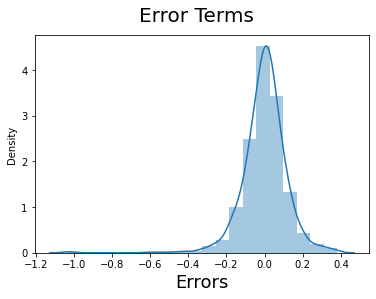

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [91]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

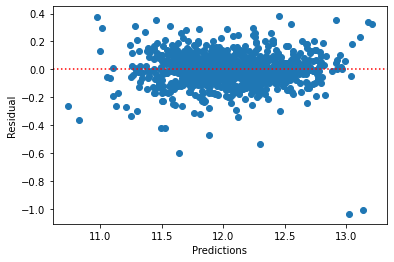

In [92]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

In [93]:
#Prediction and Evalution on Test Data

In [94]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
1436,0.375000,0.464334,0.250,0.625,0.350000,0.000000,0.333333,0.428571,0.285714,0.833333,...,0,0,0,0,0,1,0,0,0,1
57,0.756579,0.627687,0.625,0.375,0.900000,0.000000,0.666667,0.714286,0.285714,0.166667,...,0,1,0,0,0,0,0,0,1,0
780,0.414474,0.394855,0.625,0.375,0.766667,0.092542,0.333333,0.714286,0.285714,0.166667,...,0,1,0,0,0,0,0,0,0,0
382,0.625000,0.479465,0.625,0.375,0.933333,0.000000,0.666667,0.714286,0.857143,0.166667,...,0,1,0,0,0,0,0,0,1,0
1170,0.585526,0.518682,0.500,0.625,0.450000,0.000000,0.333333,0.428571,0.857143,0.833333,...,0,1,0,0,0,0,0,0,0,0


In [95]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.504286,0.509185,0.514522,0.505695,0.576500,0.218591,0.462415,0.582167,0.433778,0.572513,...,0.002278,0.610478,0.015945,0.052392,0.004556,0.255125,0.054670,0.054670,0.314351,0.398633
std,0.220676,0.223531,0.167138,0.244305,0.346002,0.322773,0.193874,0.205746,0.263081,0.348212,...,0.047727,0.488198,0.125407,0.223070,0.067420,0.436429,0.227594,0.227594,0.464786,0.490176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.386456,0.375000,0.375000,0.266667,0.000000,0.333333,0.428571,0.285714,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.493421,0.487494,0.500000,0.375000,0.716667,0.000000,0.333333,0.714286,0.285714,0.666667,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.638158,0.631083,0.625000,0.625000,0.900000,0.423744,0.666667,0.714286,0.571429,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [97]:
#trained model columns
#drop the const
X_train_rf1 = X_train_rfe.drop(['const'], axis=1)
X_train_rf1.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtQual',
       'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'HouseAge', 'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_90',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'HouseStyle_1.5Unf', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd',
       'Exterior2nd_Stone', 'Foundation_Wood'],
      dtype='object')

In [98]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rf1.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [99]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()


In [100]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [101]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.88

In [102]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     114.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):          1.61e-183
Time:                        05:59:26   Log-Likelihood:                 285.52
No. Observations:                 439   AIC:                            -503.0
Df Residuals:                     405   BIC:                            -364.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.6385      0.098    108.506      0.000      10.446      10.831
LotArea                  0.1641      0.040      4.119      0.000       0.086       0.242
OverallQual              0.6447      0.072      9.010      0.000       0.504       0.785
OverallCond              0.2681      0.033      8.058      0.000       0.203       0.333
YearRemodAdd            -0.0065      0.028     -0.229      0.819      -0.062       0.049
BsmtQual                 0.1668      0.053      3.137      0.002       0.062       0.271
BsmtFinSF1               0.1295      0.032      3.994      0.000       0.066       0.193
1stFlrSF                 0.5494      0.211      2.598      0.010       0.134       0.965
2ndFlrSF                 0.4535      0.210      2.162      0.031       0.041       0.866
GrLivArea                0.0293      0.269      0.109      0.913      -0.499       0.558
GarageArea               0.2432      0.041      5.880      0.000       0.162       0.324
HouseAge                -0.3282      0.056     -5.897      0.000      -0.438      -0.219
MSSubClass_30           -0.0395      0.031     -1.291      0.197      -0.100       0.021
MSSubClass_45            0.0481      0.067      0.718      0.473      -0.084       0.180
MSSubClass_90           -0.0964      0.044     -2.183      0.030      -0.183      -0.010
MSSubClass_160          -0.0556      0.040     -1.393      0.164      -0.134       0.023
MSZoning_FV              0.4701      0.106      4.424      0.000       0.261       0.679
MSZoning_RH              0.1689      0.113      1.495      0.136      -0.053       0.391
MSZoning_RL              0.3468      0.083      4.175      0.000       0.184       0.510
MSZoning_RM              0.3056      0.083      3.683      0.000       0.142       0.469
LotShape_IR3            -0.1043      0.134     -0.781      0.435      -0.367       0.158
Neighborhood_ClearCr    -0.0010      0.050     -0.021      0.984      -0.099       0.097
Neighborhood_Crawfor     0.1462      0.037      3.961      0.000       0.074       0.219
Neighborhood_MeadowV    -0.1194      0.069     -1.741      0.082      -0.254       0.015
Neighborhood_NoRidge     0.0427      0.057      0.748      0.455      -0.070       0.155
Neighborhood_NridgHt     0.0852      0.037      2.301      0.022       0.012       0.158
Neighborhood_Somerst    -0.0618      0.059     -1.051      0.294      -0.177       0.054
Neighborhood_StoneBr     0.1738      0.044      3.939      0.000       0.087       0.261
HouseStyle_1.5Unf        0.0481      0.067      0.718      0.473      -0.084       0.180
Exterior1st_BrkComm   8.953e-17   4.27e-17      2.098      0.037    5.64e-18    1.73e-16
Exterior1st_BrkFace      0.0940      0.040      2.361      0.019       0.016       0.172
Exterior1st_CemntBd      0.0413      0.153      0.270    

Text(0, 0.5, 'y_pred')

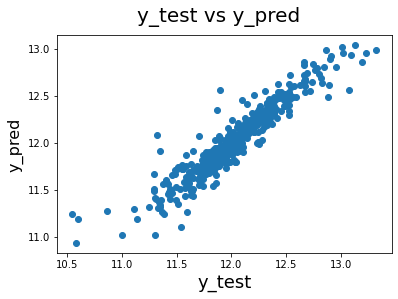

In [103]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [104]:
#Ridge Regression

Fitting 11 folds for each of 28 candidates, totalling 308 fits


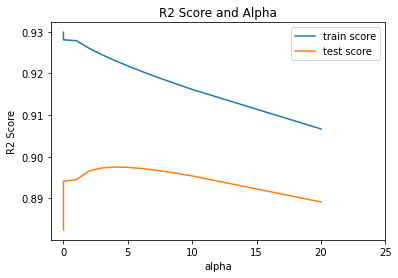

The optimum alpha is 4
The R2 Score of the model on the test dataset for optimum alpha is 0.8847197645048822
The MSE of the model on the test dataset for optimum alpha is 0.01899988616149118


In [105]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha_r = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha_r)
ridge_final = Ridge(alpha=alpha_r)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred_r= ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred_r))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred_r))

In [106]:
 #Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef),columns=X_train_rfe.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

,Ridge Co-Efficient
OverallQual,0.288297
GrLivArea,0.271558
1stFlrSF,0.219355
OverallCond,0.174195
BsmtFinSF1,0.143023
2ndFlrSF,0.135860
GarageArea,0.129784
LotArea,0.126443
MSZoning_RL,0.119011
MSZoning_FV,0.111684


Fitting 11 folds for each of 11 candidates, totalling 121 fits


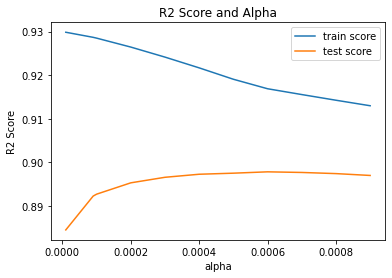

The optimum alpha is 0.0006
The R2 Score of the model on the test dataset for optimum alpha is 0.8856271029692075
The MSE of the model on the test dataset for optimum alpha is 0.018850343375964387


In [107]:
# Builsing a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha_l = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha_l)
lasso_final2 = Lasso(alpha=alpha_l,random_state=100)
lasso_final2.fit(X_train_rfe,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred_l= lasso_final2.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred_l))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred_l))

In [108]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

,Lasso Co-Efficient
GrLivArea,0.540342
OverallQual,0.422573
OverallCond,0.195187
BsmtFinSF1,0.146311
GarageArea,0.133949
LotArea,0.132194
1stFlrSF,0.095272
Neighborhood_Crawfor,0.093775
Exterior1st_BrkFace,0.086426
Neighborhood_Somerst,0.084273


Error distribution in test dataset


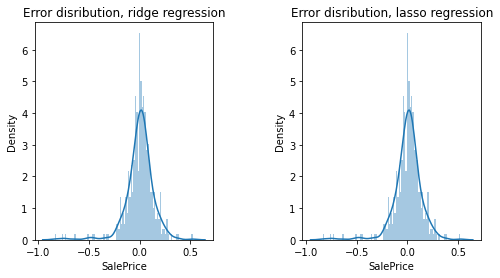

In [109]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_test_pred_r), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_test_pred_r), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [110]:

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_test_pred_r), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_test_pred_l), 2))

r2_score in test dataset:
r2_score for ridge: 0.88
r2_score for lasso: 0.89


In [111]:
print('The optimum alpha is for ridge regression',alpha_r)
print('The optimum alpha is for lasso regression',alpha_l)

The optimum alpha is for ridge regression 4
The optimum alpha is for lasso regression 0.0006


# Subjective Questions - Demonstration/Validation


1)What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimum alpha is for ridge regrrssion 4

The optimum alpha is for lasso regression 0.0006

In [112]:
#doubling alpha for lasso =0.0012
alpha=0.0012
lasso_final2 = Lasso(alpha=alpha,random_state=100)

lasso_final2.fit(X_train_rfe,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred_l= lasso_final2.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred_l))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred_l))

The R2 Score of the model on the test dataset for optimum alpha is 0.8810272540635858
The MSE of the model on the test dataset for optimum alpha is 0.01960846644182656


In [113]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

,Lasso Co-Efficient
GrLivArea,0.558779
OverallQual,0.451126
OverallCond,0.172301
GarageArea,0.137731
BsmtFinSF1,0.132628
LotArea,0.126803
1stFlrSF,0.107735
BsmtQual,0.087254
Neighborhood_Crawfor,0.078571
Neighborhood_Somerst,0.076750


In [114]:
#doubling alpha for Ridge=8

alpha_r = 16
print('The optimum alpha is',alpha_r)
ridge_final = Ridge(alpha=alpha_r)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred_r= ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred_r))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred_r))

The optimum alpha is 16
The R2 Score of the model on the test dataset for optimum alpha is 0.876276726248358
The MSE of the model on the test dataset for optimum alpha is 0.020391423618385692


In [115]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

,Lasso Co-Efficient
GrLivArea,0.558779
OverallQual,0.451126
OverallCond,0.172301
GarageArea,0.137731
BsmtFinSF1,0.132628
LotArea,0.126803
1stFlrSF,0.107735
BsmtQual,0.087254
Neighborhood_Crawfor,0.078571
Neighborhood_Somerst,0.076750


3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [116]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_rfe3 = X_test.drop(['GrLivArea','OverallQual','OverallCond','BsmtFinSF1','GarageArea'],axis=1)
X_train_rfe3 = X_train_rfe.drop(['GrLivArea','OverallQual','OverallCond','BsmtFinSF1','GarageArea'],axis=1)

# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.0001,random_state=100)
lasso3.fit(X_train_rfe3,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_rfe3)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.8585280211933887
The MSE of the model on the test dataset is 0.02331667246186659
The most important predictor variables are as follows:


,Lasso Co-Efficient
1stFlrSF,0.604992
2ndFlrSF,0.439335
MSZoning_FV,0.413685
MSZoning_RL,0.412696
MSZoning_RH,0.405729
